In [1]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [2]:
path =  r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\dataset\SMSSpamCollection"

In [3]:
with open(path, 'r') as f:
    data = f.readlines()

In [4]:
x = [i.split('\t') for i in data]

In [5]:
df = pd.DataFrame(data = x, columns = ['label', 'text'])

In [6]:
# df= pd.read_csv(path, sep='\t', names = ['label', 'text']) # names are column names
# df

#### Separate the input and output variables

In [8]:
x= df['text']
y=df['label']

#### Explore data

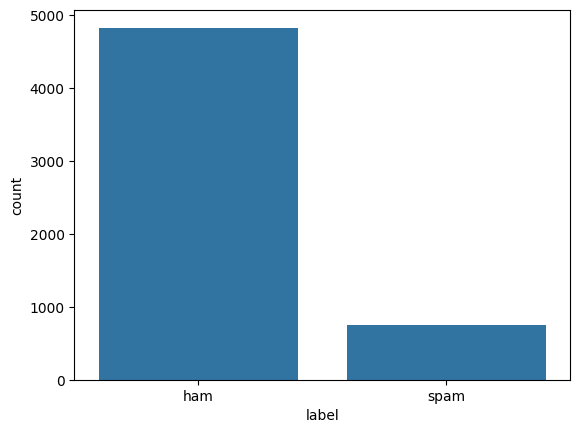

In [10]:
import seaborn as sns
sns.countplot(x=y); # data is not balanced 

In [11]:
y.value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

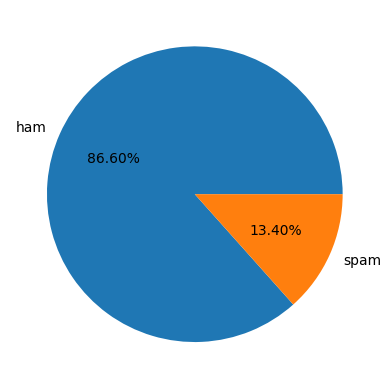

In [12]:
import matplotlib.pyplot as plt
plt.pie(y.value_counts(), labels= y.value_counts().index, autopct= '%2.2f%%');

In [13]:
# pip install wordcloud pillow -U

#### Separate the ham and spam messages

In [15]:
ham = x[y=='ham']
spam= x[y=='spam']

In [16]:
ham = ' '.join(ham.tolist())
spam = ' '.join(spam.tolist())

In [17]:
len(ham), len(spam)

(355017, 105419)

In [18]:
from wordcloud import WordCloud

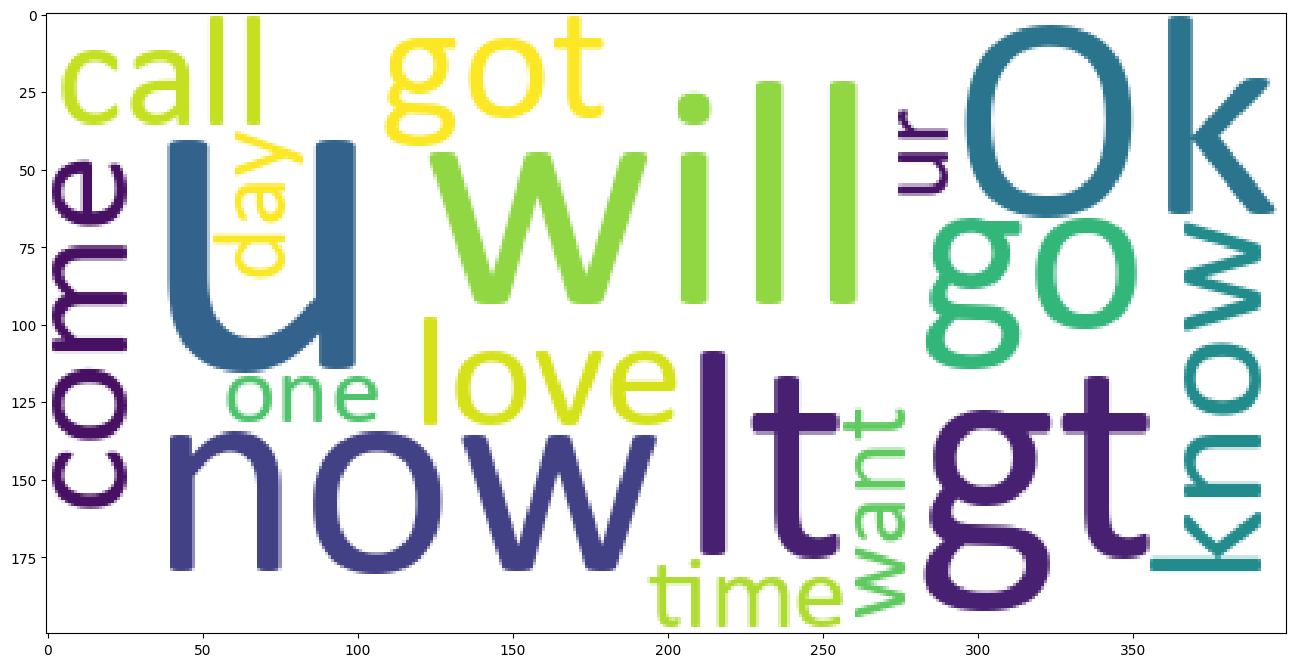

In [19]:
wc_notspam = WordCloud(font_path = 'calibri.ttf', background_color = 'white',
          max_words = 16).generate(ham)

plt.figure(figsize = (16, 9))
plt.imshow(wc_notspam)

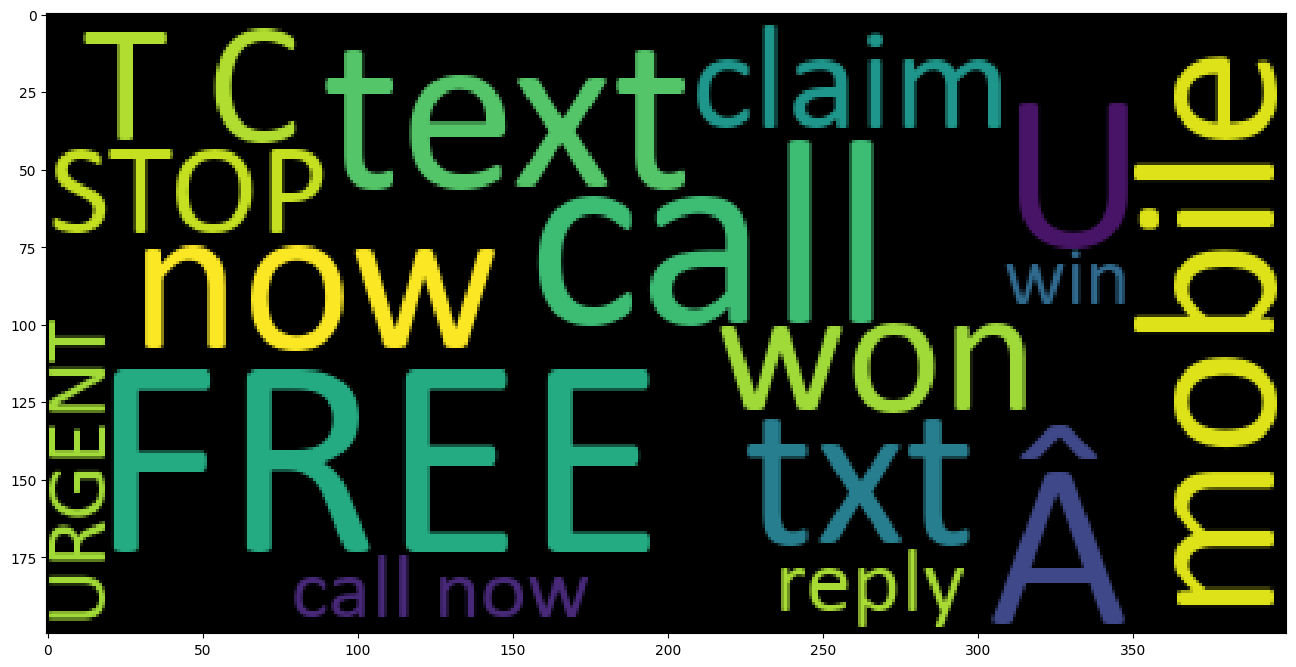

In [20]:
wc_spam = WordCloud(font_path = 'calibri.ttf', background_color = 'black',
          max_words = 16).generate(spam)

plt.figure(figsize = (16, 9))
plt.imshow(wc_spam)

In [21]:
wc_notspam.words_ # considering highest occuring word as 100 % width , other words width is given

{'u': 1.0,
 'will': 0.33096446700507615,
 'lt gt': 0.2802030456852792,
 'Ok': 0.2649746192893401,
 'now': 0.2578680203045685,
 'go': 0.25583756345177666,
 'got': 0.2365482233502538,
 'know': 0.2182741116751269,
 'come': 0.21116751269035533,
 'call': 0.20812182741116753,
 'love': 0.20609137055837565,
 'time': 0.20101522842639594,
 'ur': 0.19898477157360406,
 'day': 0.18883248730964466,
 'want': 0.18781725888324874,
 'one': 0.17766497461928935}

In [22]:
wc_spam.words_

{'FREE': 1.0,
 'call': 0.85,
 'Â': 0.665,
 'text': 0.63,
 'U': 0.585,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.47,
 'won': 0.365,
 'T C': 0.33,
 'claim': 0.315,
 'STOP': 0.315,
 'reply': 0.31,
 'call now': 0.29,
 'URGENT': 0.28,
 'win': 0.27}

#### Data Preparation

In [24]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import string

In [25]:
sent = 'Hello friends! How are you? I like Python Programming.'

In [26]:
tokens = word_tokenize(sent.lower())
tokens1 = [i for i in tokens if i not in string.punctuation]
tokens2 = [i for i in tokens1 if i not in stopwords.words('english')]

In [27]:
tokens2

['hello', 'friends', 'like', 'python', 'programming']

In [28]:
from nltk.stem import PorterStemmer
ps= PorterStemmer()

# remove the affixes
tokens3 = [ps.stem(token) for token in tokens2]
tokens3

['hello', 'friend', 'like', 'python', 'program']

In [29]:
def clean_sentance(sent):
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    import string

    
    ps = PorterStemmer()
    tokens = word_tokenize(sent.lower())
    tokens1 = [i for i in tokens if i.isalpha()]
    # tokens1 = [i for i in tokens if i not in string.punctuation and not i.isnumeric()]
    tokens2 = [i for i in tokens1 if i not in stopwords.words('english')]
    tokens3 = [ps.stem(i) for i in tokens2]

    return tokens3

In [30]:
clean_sentance(sent)

['hello', 'friend', 'like', 'python', 'program']

In [31]:
sent1='It was nice working with you' 

In [32]:
clean_sentance(sent1)

['nice', 'work']

In [33]:
x

0       Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...\n
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570              Will Ã¼ b going to esplanade fr home?\n
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                         Rofl. Its true to its name\n
Name: text, Length: 5574, dtype: object

In [34]:
x.apply(clean_sentance)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5569    [time, tri, contact, u, pound, prize, claim, e...
5570                          [b, go, esplanad, fr, home]
5571                                [piti, mood, suggest]
5572    [guy, bitch, act, like, interest, buy, someth,...
5573                                   [rofl, true, name]
Name: text, Length: 5574, dtype: object

#### Apply TF*IDF Vectorizer

In [36]:
tfid = TfidfVectorizer(analyzer=clean_sentance)

In [37]:
x_new = tfid.fit_transform(x)

In [38]:
x_new.shape

(5574, 5950)

In [39]:
tfid.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zyada', 'â', 'ãœ'], dtype=object)

In [40]:
len(tfid.get_feature_names_out())

5950

#### Cross-Validation

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, random_state=0, stratify = y) # Defsult is 75 % 25%

In [44]:
X_train.shape, X_test.shape

((4180, 5950), (1394, 5950))

## build the model

In [46]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [48]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [49]:
accuracy

0.9770444763271162

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1207
        spam       0.99      0.83      0.91       187

    accuracy                           0.98      1394
   macro avg       0.98      0.92      0.95      1394
weighted avg       0.98      0.98      0.98      1394



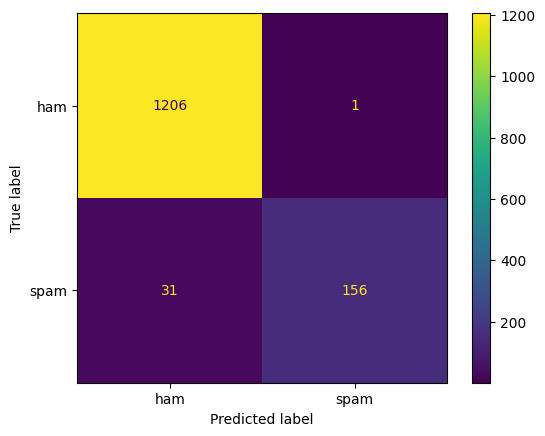

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [52]:
svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)

SVC()

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [55]:
accuracy

0.9670014347202296

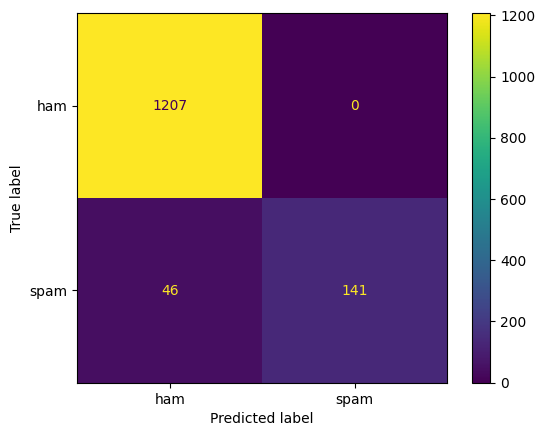

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [57]:
svm = SVC(kernel = 'poly')
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [58]:
from sklearn.metrics import accuracy_score, classification_report

In [59]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [60]:
accuracy

0.9282639885222381

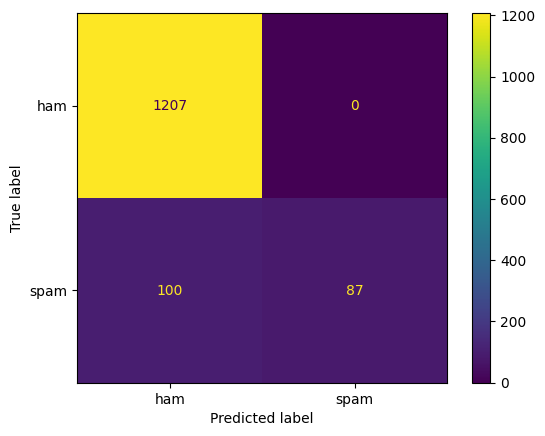

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [62]:
svm = SVC(kernel = 'sigmoid')
svm.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
# test = clean_sentance('Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.')
# test = tfid.transform(test)

In [65]:
# y_pred = svm.predict(test)

In [66]:
# y_pred

In [67]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [68]:
accuracy

0.9705882352941176

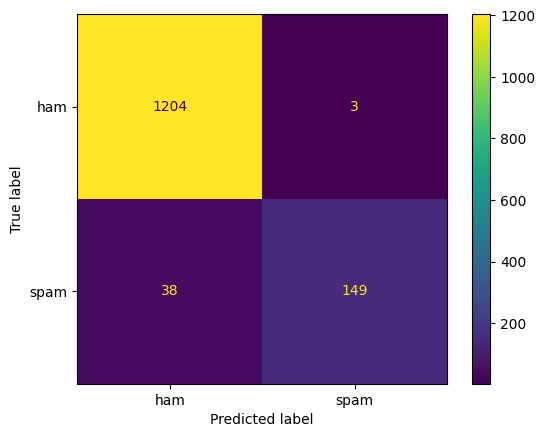

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1207
        spam       0.98      0.80      0.88       187

    accuracy                           0.97      1394
   macro avg       0.97      0.90      0.93      1394
weighted avg       0.97      0.97      0.97      1394



### prediction on unknown messages

In [72]:
with open (r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\dataset\sample.csv", 'r') as f:
    lines = f.readlines()

In [73]:
lines

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a Â£1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [74]:
svm.predict(tfid.transform(lines))

array(['ham', 'spam', 'ham'], dtype=object)

In [75]:
# the unknown data(words in the new test data) which is not fitted in tfidf  will be ignored i.e discarded

# save the model

In [79]:
import pickle

In [142]:
import joblib
import os

In [161]:
path1 = os.path.join('..', 'outputs')

In [151]:
path = os.path.join('..', 'outputs', 'classifier.model')

In [153]:
joblib.dump(svm, path)

['..\\outputs\\classifier.model']

In [155]:
classifier = joblib.load(path)


In [159]:
classifier.predict(tfid.transform(lines))

array(['ham', 'spam', 'ham'], dtype=object)

In [175]:
x = os.path.join(path1, 'tfidf.model')
x

'..\\outputs\\tfidf.model'

In [177]:
joblib.dump(tfid, os.path.join(path1, x))

['..\\outputs\\..\\outputs\\tfidf.model']

### deploy the model using UI in application

In [187]:
from tkinter import *

In [201]:
top = Tk()
top.title('Spam Classification')
top.geometry('800x600')

 
def clean_sentance(sent):  # because this analyzer is used in our tfidf model so we need to have this here too
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    import string

    
    ps = PorterStemmer()
    tokens = word_tokenize(sent.lower())
    tokens1 = [i for i in tokens if i.isalpha()]
    # tokens1 = [i for i in tokens if i not in string.punctuation and not i.isnumeric()]
    tokens2 = [i for i in tokens1 if i not in stopwords.words('english')]
    tokens3 = [ps.stem(i) for i in tokens2]

    return tokens3


    
def check():
    classifier = joblib.load(path)
    tfidf = joblib.load(os.path.join(path1, 'tfidf.model'))
    message = str(t.get("1.0", END)) #"1.0": Indicates the starting position of the text to retrieve. In Tkinter, "1.0" means the first character of the first line (1 = first line, .0 = the 0th character in that line).
    result = classifier.predict(tfidf.transform([message]))

    l.config(text = 'Message is :' + str(result[0]))
    l.place(x = 350, y = 550)

Label(top, text = 'Enter your message here:').place(x = 50, y = 30)
t = Text(top)
t.place(x = 50, y = 70)
Button(top, text = 'Check', command = check).place(x = 350, y = 500)
l = Label(top, text = 'Message is:')


top.mainloop()

In [ ]:
def clean_sentance(sent):
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    import string

    
    ps = PorterStemmer()
    tokens = word_tokenize(sent.lower())
    tokens1 = [i for i in tokens if i.isalpha()]
    # tokens1 = [i for i in tokens if i not in string.punctuation and not i.isnumeric()]
    tokens2 = [i for i in tokens1 if i not in stopwords.words('english')]
    tokens3 = [ps.stem(i) for i in tokens2]

    return tokens3